<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: Final Project</h1>
### By Kayla Besong

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Import Necessary Packages & Set Directory

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import matplotlib.animation as animation
import os
from JSAnimation.IPython_display import display_animation, anim_to_html

path="/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project"
print(path)
os.chdir(path)

/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project


### Data Processing Functions
#### Makes it easy to loop through a number of different model runs or datasets with different names

In [24]:
def psi_process1(run_n, timestep):
    
    path2 = path + "/run_U%s" % run_n
    os.chdir(path2)
    
    data1 = nc.Dataset('test_kayla_U%s.nc' % run_n, 'r')
    
    psi1 = data1.variables['psi'][:]

    return psi1


def energy_process(run_n, run_type):    
    
    path2 = path + "/run_U%s" % run_n
    os.chdir(path2)    
    
    with open('%s_run_U%s.dat' % (run_type, run_n)) as db:
        for line in db.readlines():
            data = line.strip().split(',')
            e = np.empty([len(data)])
            for e_val in range(0, len(data)):
                
                e[e_val] = float(data[e_val])
    db.close()
    
    return e


## Initial Look at What the Data Might Hold
### Important to raise questions, anticipate any errors or biases, and help determine the best type of analysis  

# Looking at the Evolution of Energy
### A simple timeseries is appropriate

In [28]:
### Proccessing of each type of energy output between model layers

EKE_U2f_1 = energy_process('2f','eke1')
EKE_U2f_2 = energy_process('2f','eke2')
EPE_U2f = energy_process('2f','epe')


/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project/run_U2f
/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project/run_U2f
/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project/run_U2f


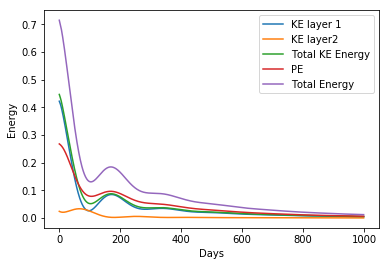

In [29]:
### Create Timeseries Plot

t = np.arange(0, len(EKE_U2f_1))

plt.plot(t, EKE_U2f_1, label = 'KE layer 1')
plt.plot(t, EKE_U2f_2, label = 'KE layer2')
plt.plot(t, EKE_U2f_1+ EKE_U2f_2, label = 'Total KE Energy')
plt.plot(t, EPE_U2f, label = 'PE')
plt.plot(t, EKE_U2f_1+ EKE_U2f_2+EPE_U2f, label = 'Total Energy')
plt.xlabel('Days')
plt.ylabel('Energy')
plt.legend()


### Decreases in PE _appear_ to correlate with decreases in KE in the first layer.
### The KE between the two layers _appears_ to be out of phase for the first half of the run, interesting! 

# Look at the evolution of flow 
### Perhaps viewing as a movie instead of plotting multiple, random snapshots is best

In [31]:
## Animation function

def make_anime(ani_mat, run_n):
    
    fig, ax = plt.subplots()

    # Some 2D geo arrays to plot (time,lat,lon)
    data = ani_mat
    lat = np.arange(len(data[0,:,0]))
    lon = np.arange(len(data[0,0,:]))
    lons,lats = np.meshgrid(lon,lat)

    mode = 'contour'
    ims = []
    for i in range(len(data[:,0,0])):
        if mode == 'contour':
            im = ax.contourf(lons,lats,data[i,:,:])
            add_arts = im.collections

        ## Add title 
        text = 'Snapshot={0!r}'.format(i)
        an = ax.annotate(text, xy=(0.45, 1.05), xycoords='axes fraction')
        ims.append(add_arts + [an])

    ani = animation.ArtistAnimation(fig, ims)
    
    ## For saving the animation we need ffmpeg binary:
    FFwriter = animation.FFMpegWriter()
    ani.save('run_U%s.mp4'% run_n, writer = FFwriter)
    
    return ani


/Users/kaylabesong/anaconda2/MPO624-2018/assignments/Final_Project/run_U2f



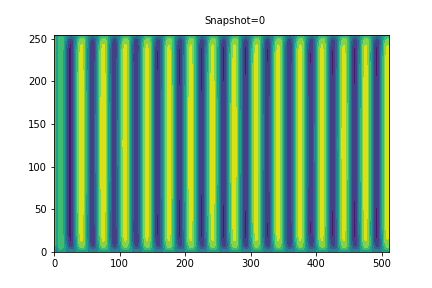
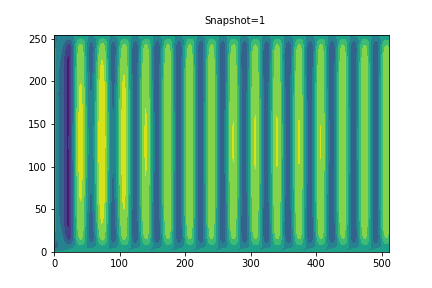
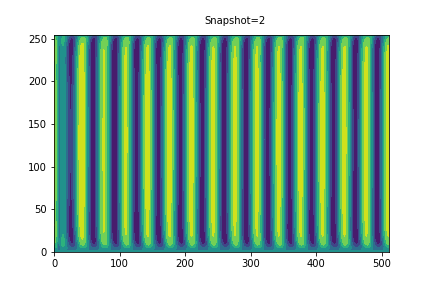
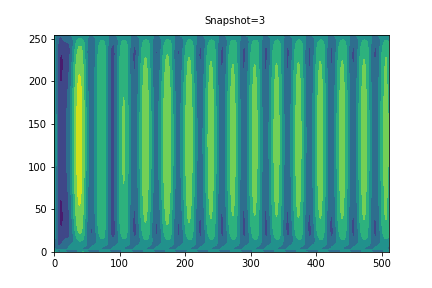
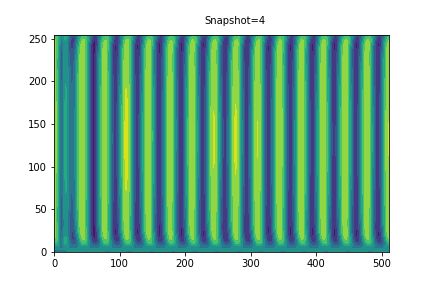
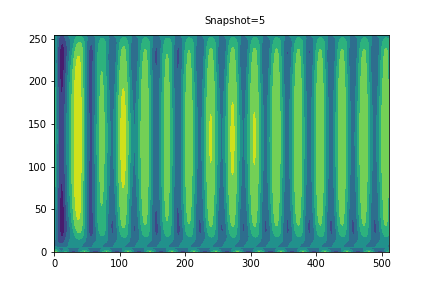
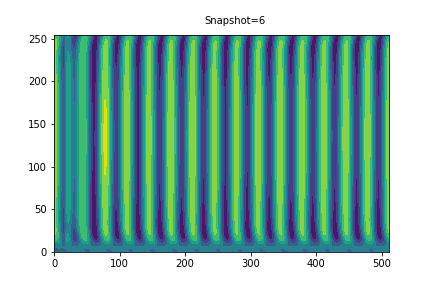
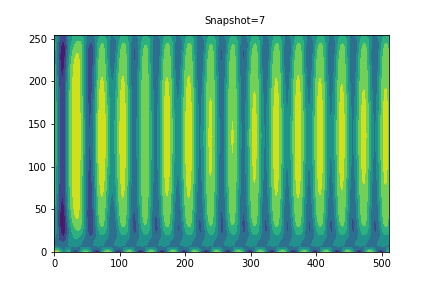
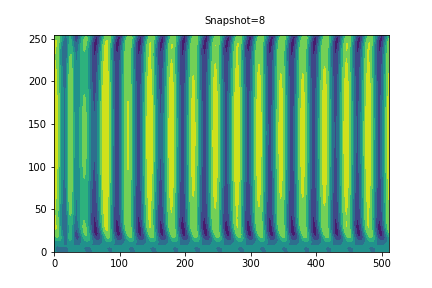
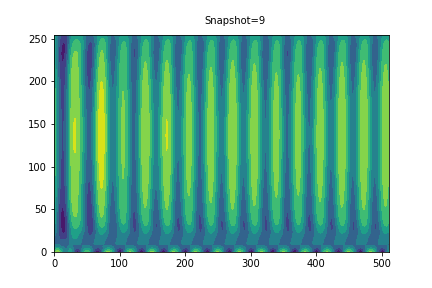
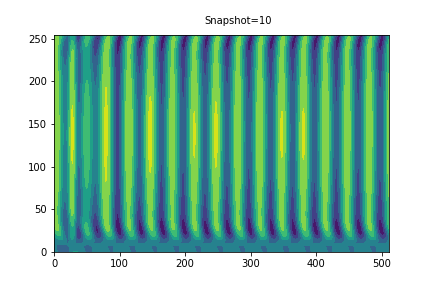
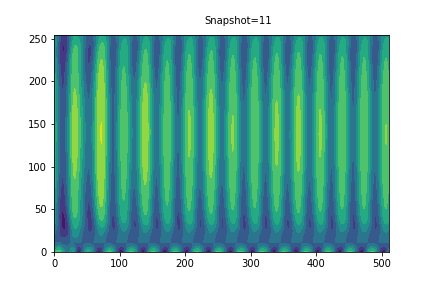
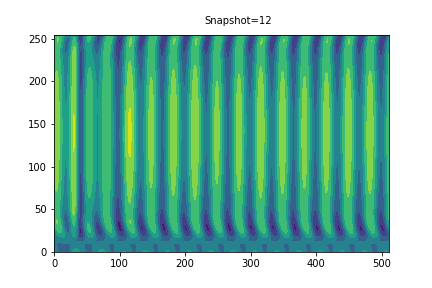
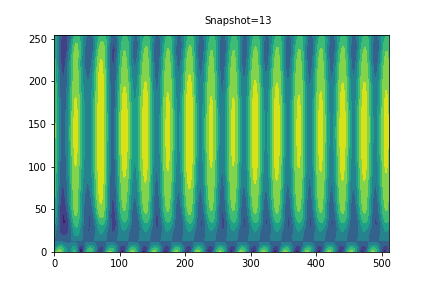
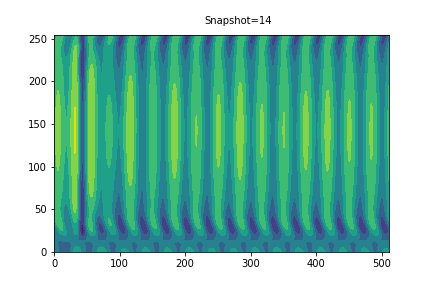
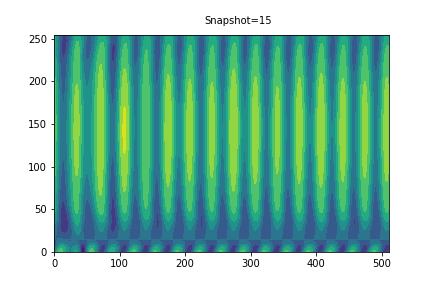
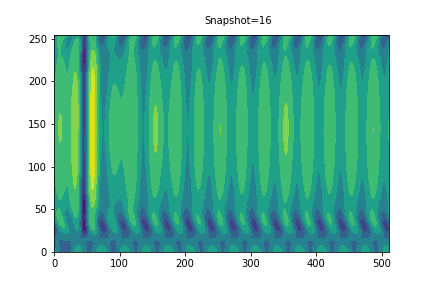
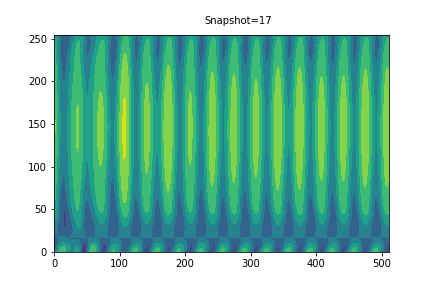
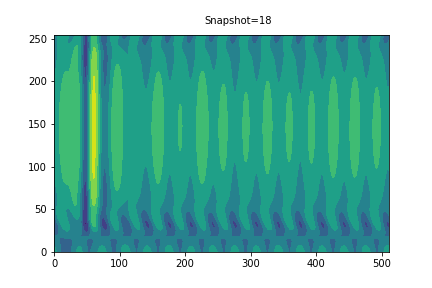
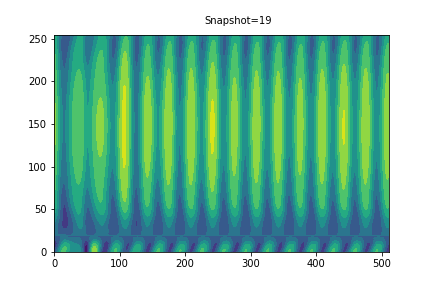
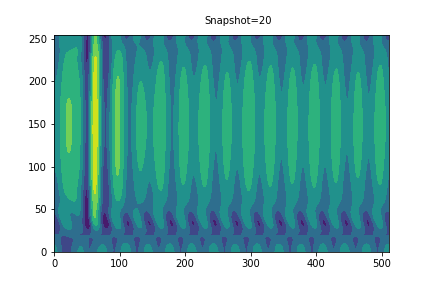
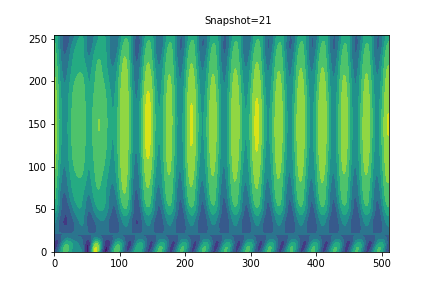
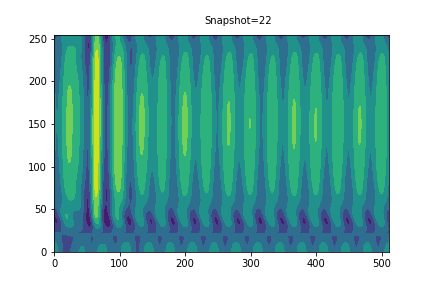
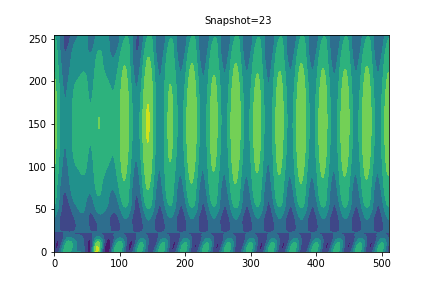
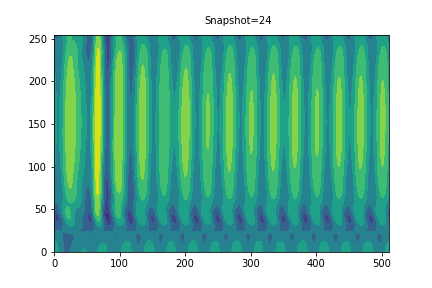
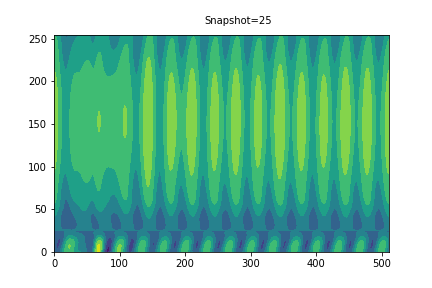
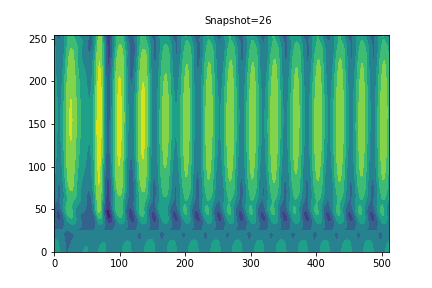
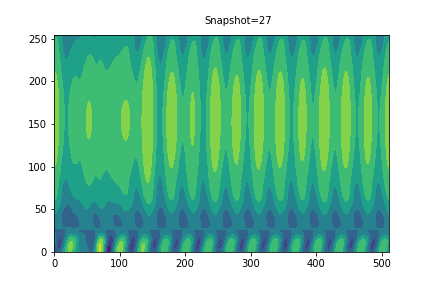
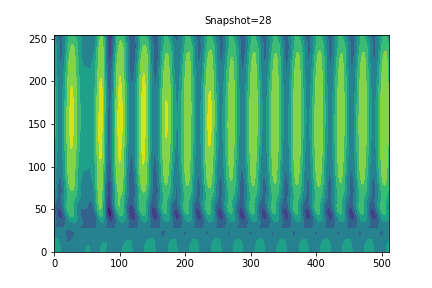
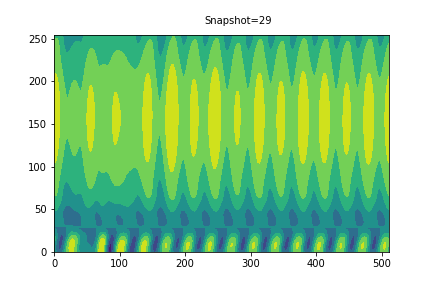
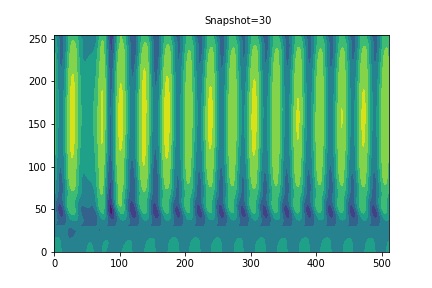
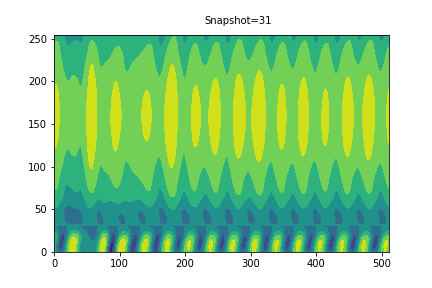
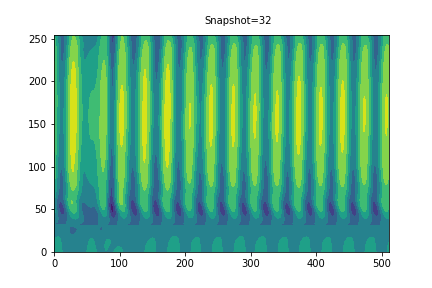
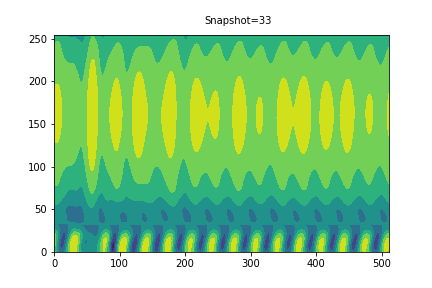
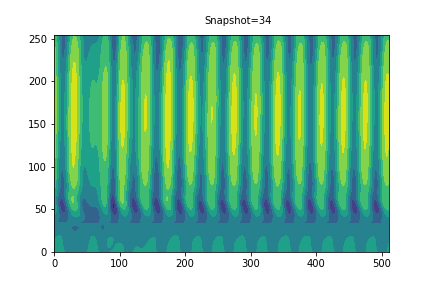
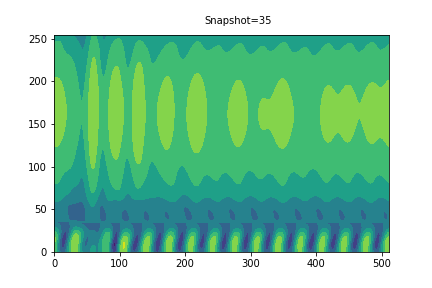
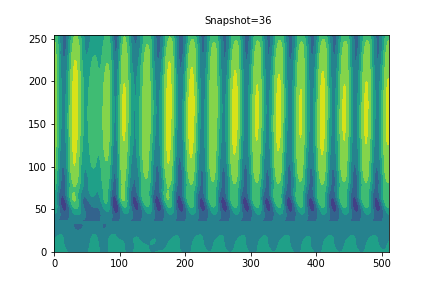
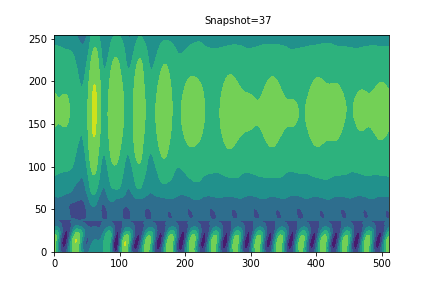
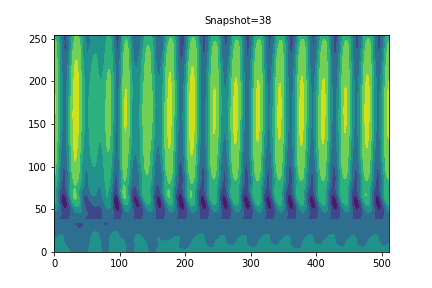
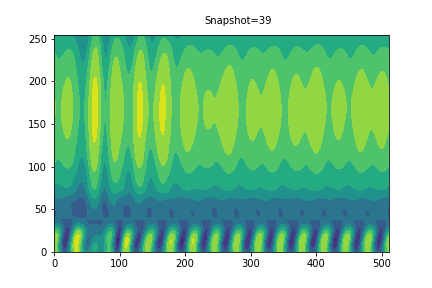
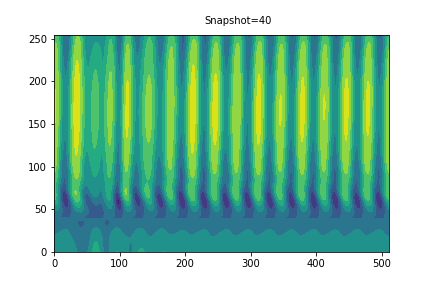
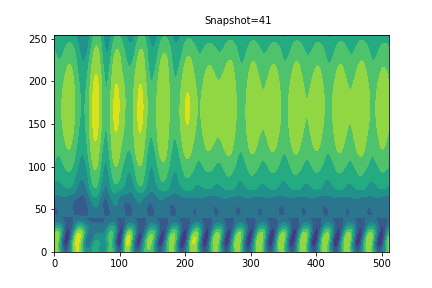
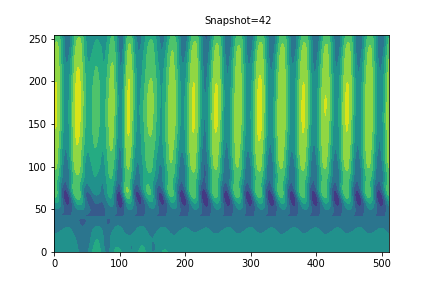
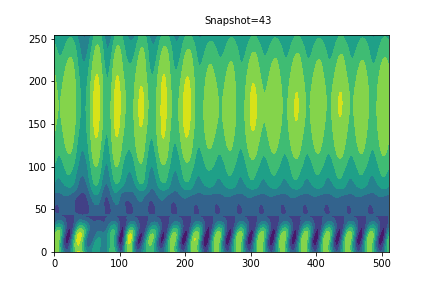
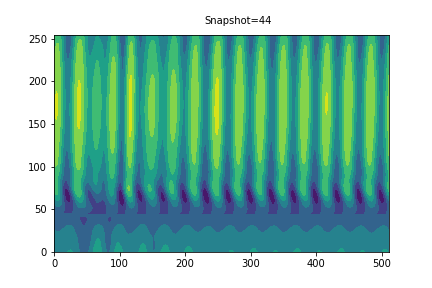
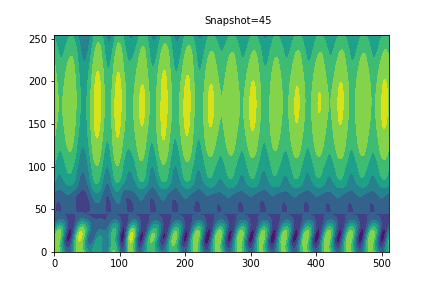
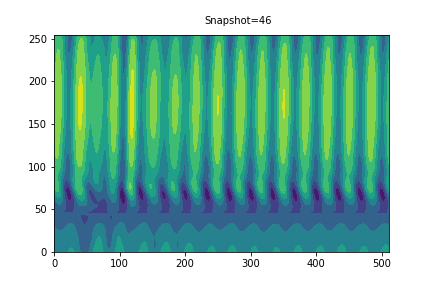
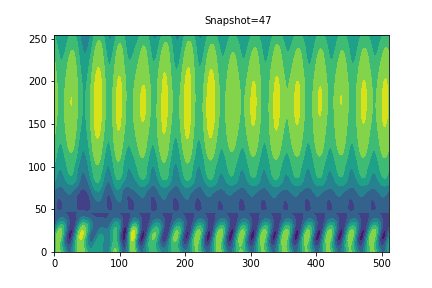
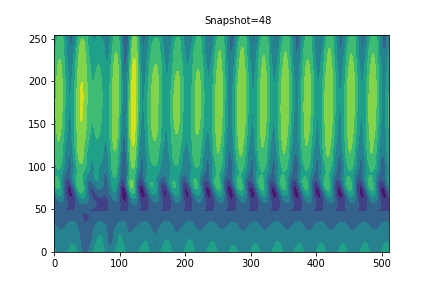
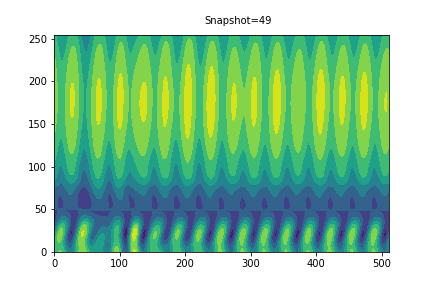
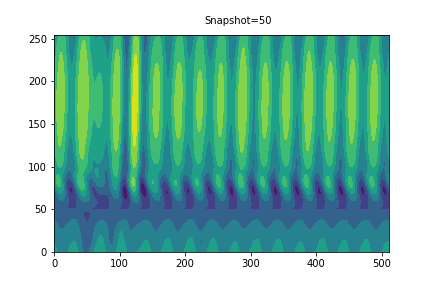
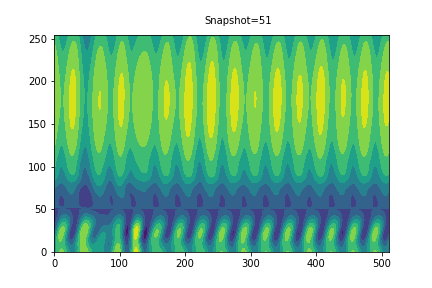
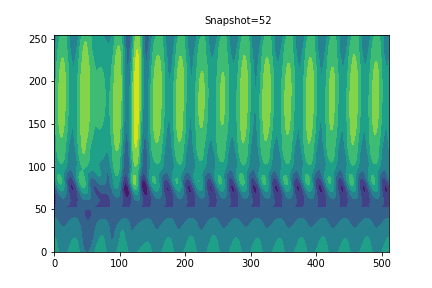
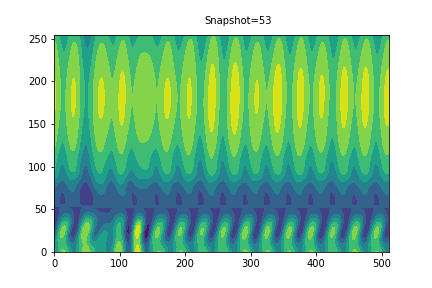
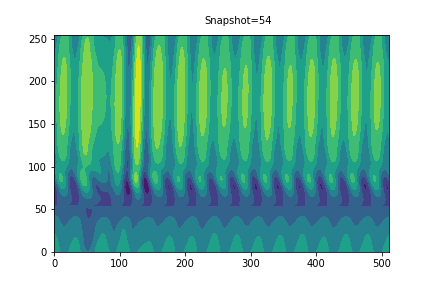
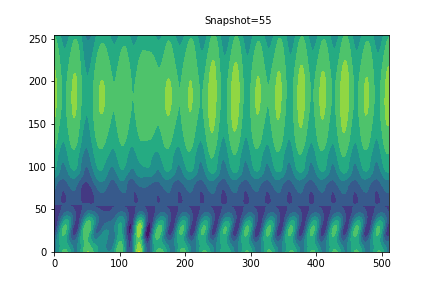
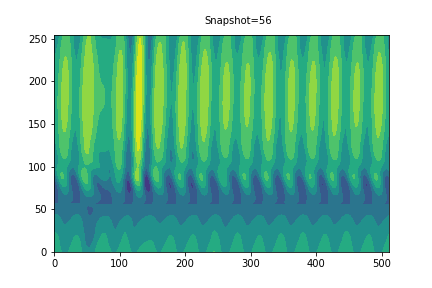
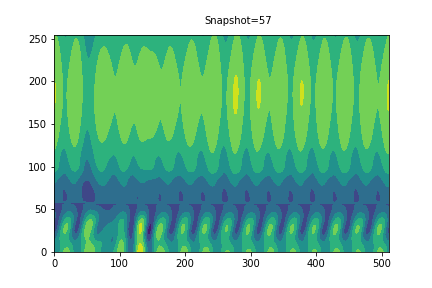
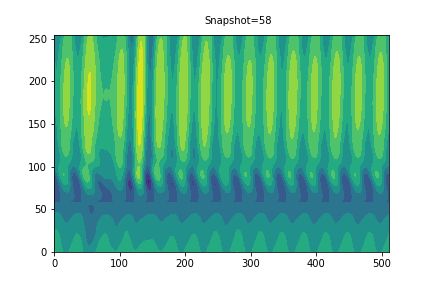
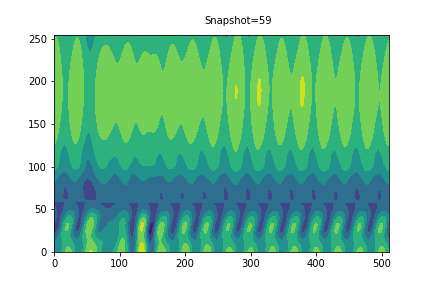
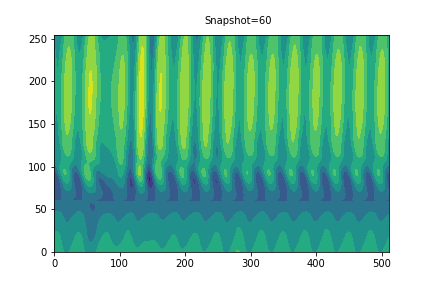
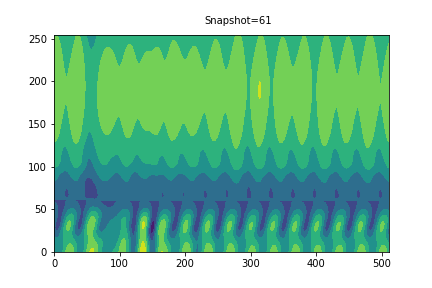
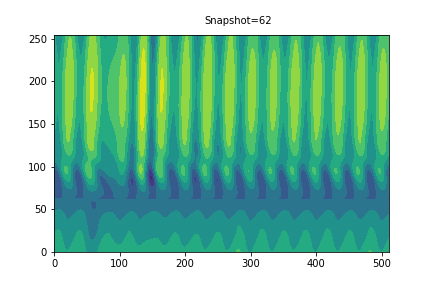
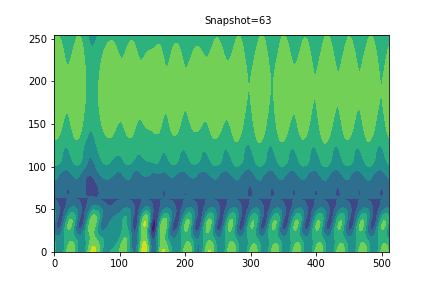
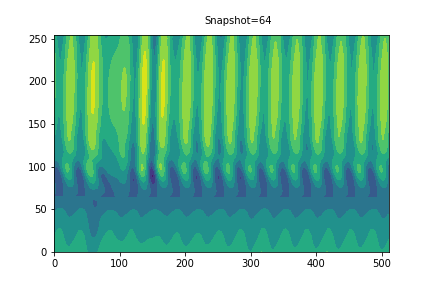
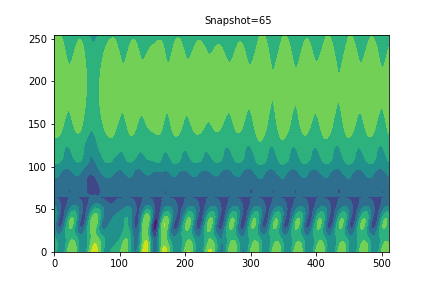
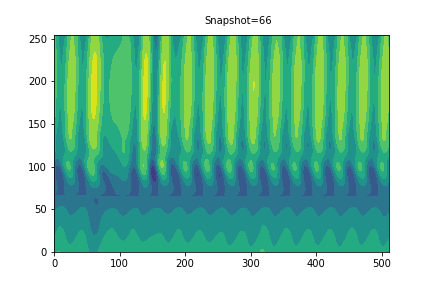
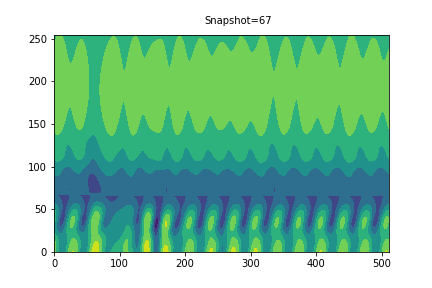
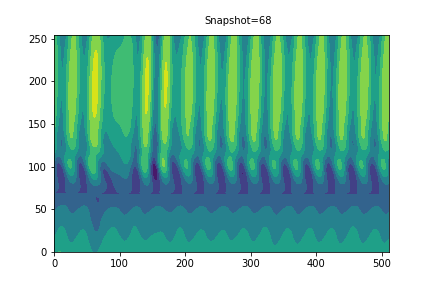
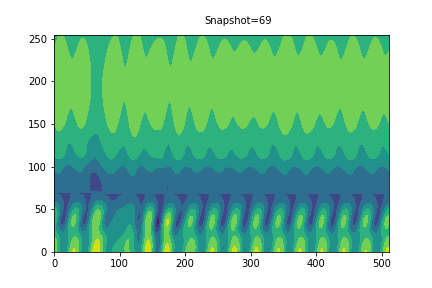
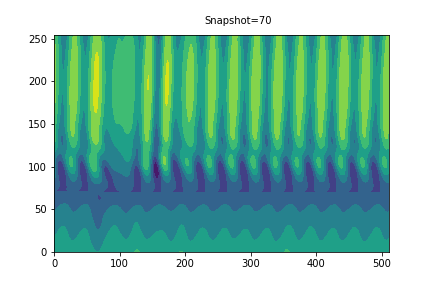
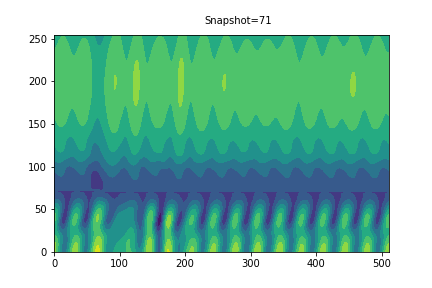
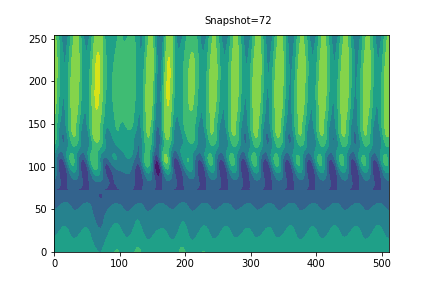
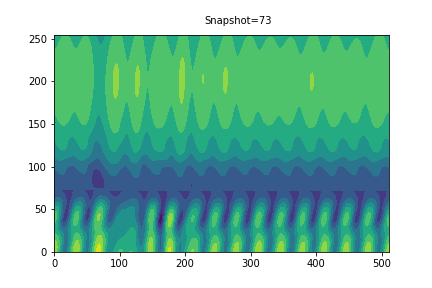
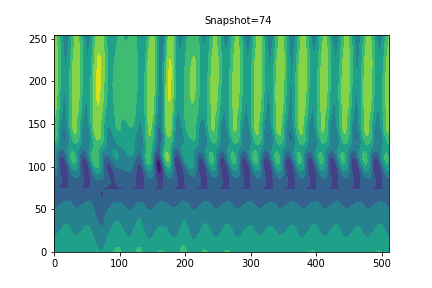
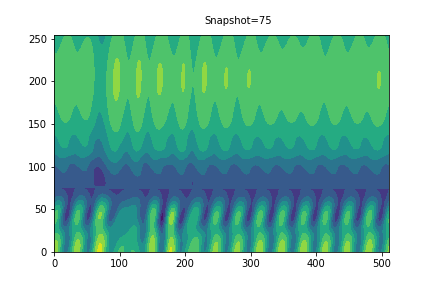
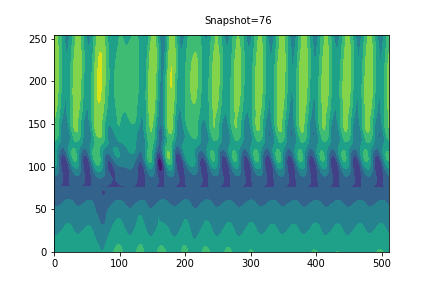
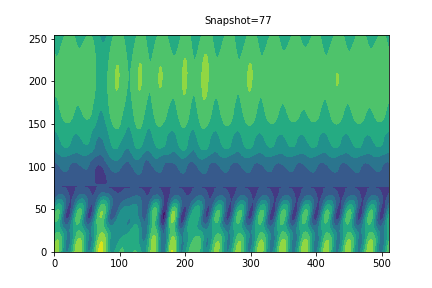
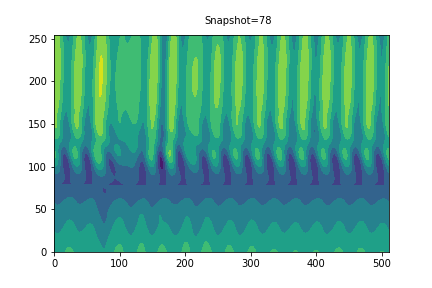
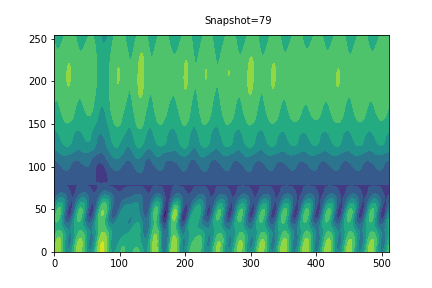
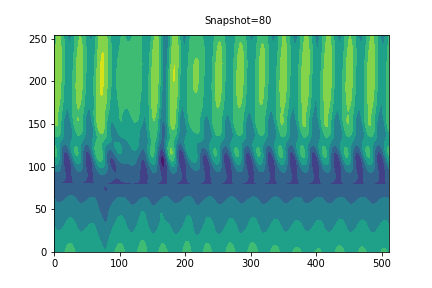
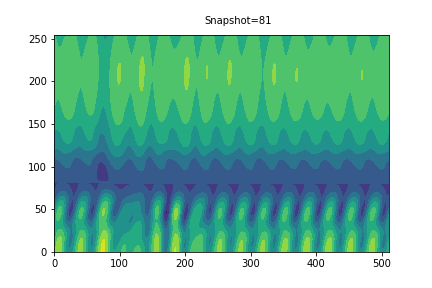
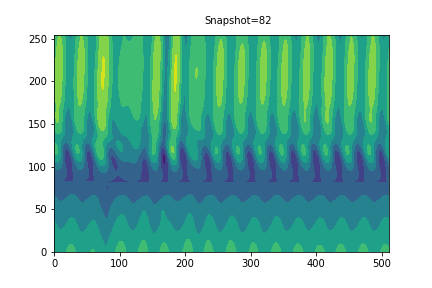
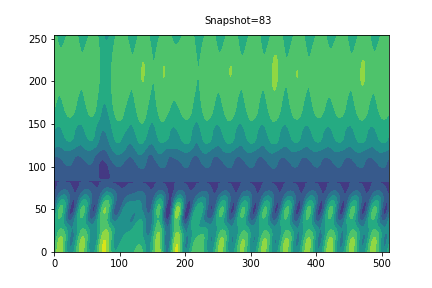
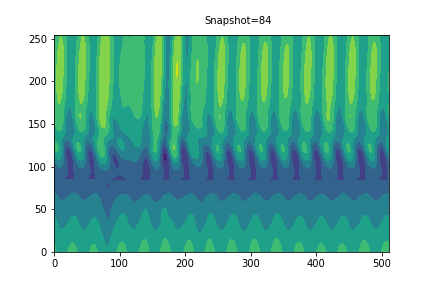
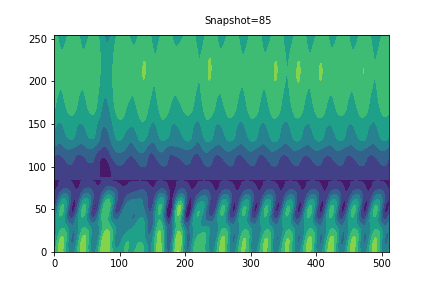
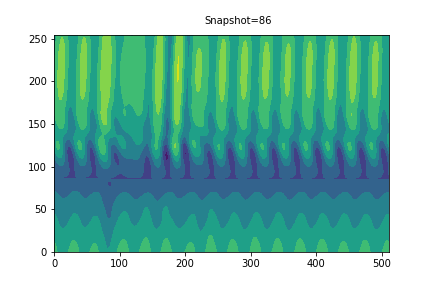
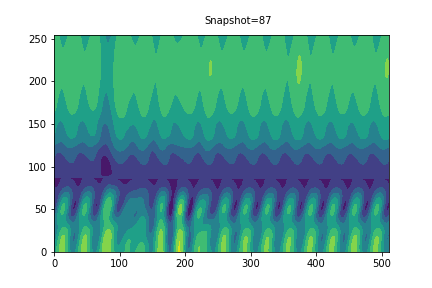
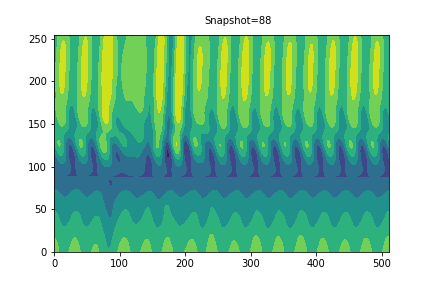
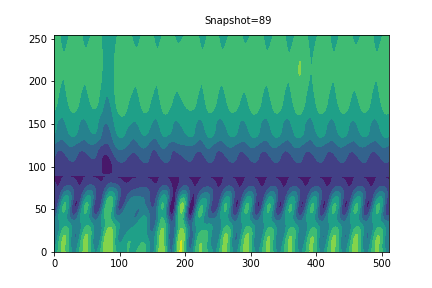
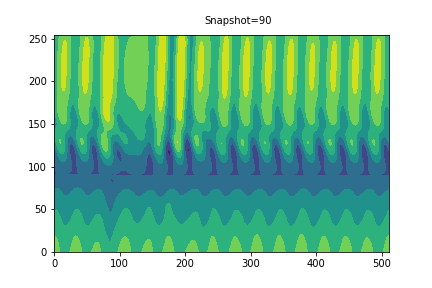
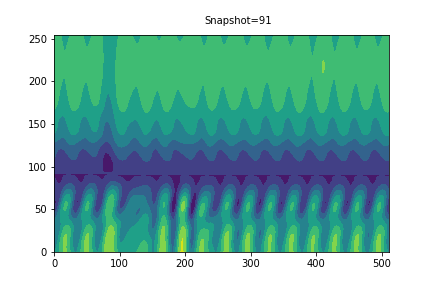
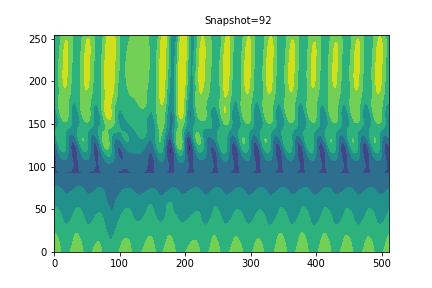
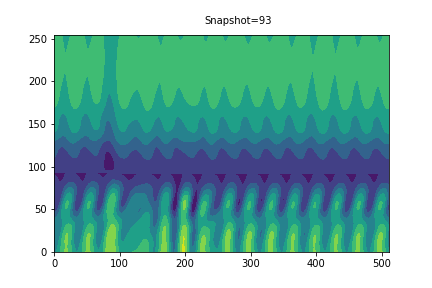
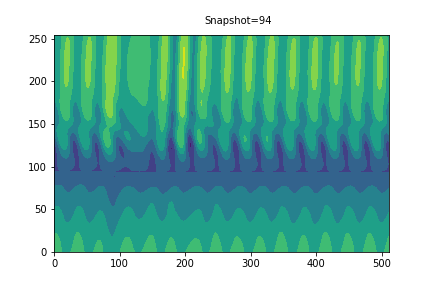
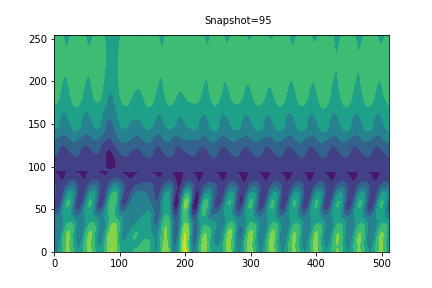
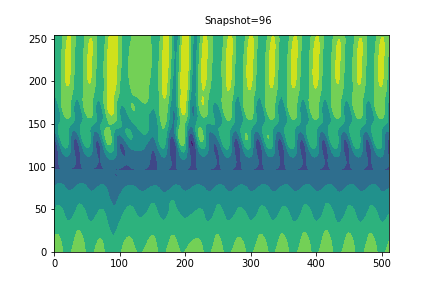
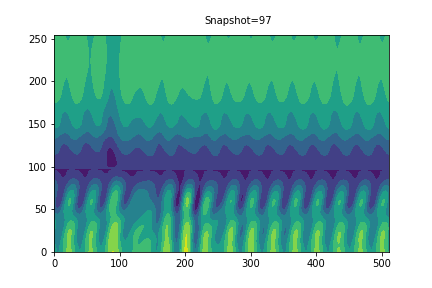
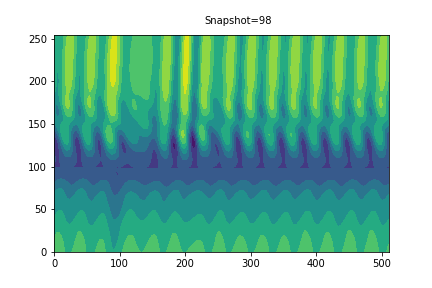
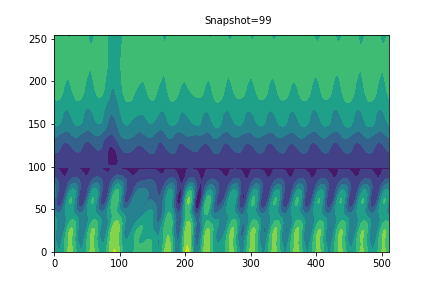

In [32]:
timestep2 = 100
ani1 = make_anime(psi_process1('2f', timestep2), '2f')
display_animation(ani1, default_mode='once')


# Energetic Relationships

## What exactly is the relationship between the APE and KE in layer1 and layer2?
## What about between KE in layer1 and layer2?

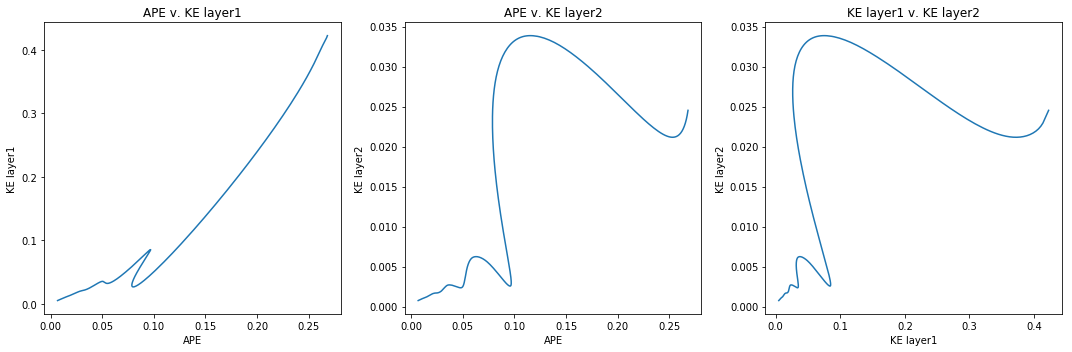

In [58]:
### Simple scatter between KE in the two layers

f, ax = plt.subplots(1,3, figsize = (15, 5))

ax[0].plot(EPE_U2f, EKE_U2f_1)
ax[0].set_title('APE v. KE layer1')
ax[0].set_xlabel("APE")
ax[0].set_ylabel("KE layer1")

ax[1].plot(EPE_U2f, EKE_U2f_2)
ax[1].set_title('APE v. KE layer2')
ax[1].set_xlabel("APE")
ax[1].set_ylabel("KE layer2")

ax[2].plot(EKE_U2f_1, EKE_U2f_2)
ax[2].set_title('KE layer1 v. KE layer2')
ax[2].set_xlabel("KE layer1")
ax[2].set_ylabel("KE layer2")

f.tight_layout(h_pad = .5)

plt.show()


## A complex relationship between energy within the system is clearly present and other factors are likely present
## The conservation of energy is much more complex (nonlinear) than PE = KE1 + KE2 for this system (obviously) 

# Wavelet of Streamfunction